# Introduction

In this project, I will analyze a dataset that contains information about students and their performances. My goal is to identify patterns and trends within the data that may help us understand what factors contribute to student success. By examining clusters in this dataset, I hope to uncover insights into the characteristics that distinguish high-performing students from their peers.

# Main Questions

- What clusters are there in this dataset 
- What factor most effect a student 
- What factors most improve a student grades

# Dataset: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [2]:
table = pd.read_csv(r"C:\Users\jesss\OneDrive\Documents\GitHub\ITCS3162\datasets\student_dropout_behavior_dataset.csv")

# Introduce the Data: 

student_id: the student indivual id number 

name: the name of the student 

Age: the age of the student

Gender: the gender of the student 

quiz1_mark: on a scale from 1-10 what the sudent got on the exam 

quiz2_mark: on a scale from 1-10 what the sudent got on the exam 

quiz3_mark: on a scale from 1-10 what the sudent got on the exam 

total_assingment: the amount of assignments the student has assigned 

assingment_submitted: the amount of assignments the student has subbmitted 

midterm_marks: the score the  student has recived on their midterm 

final_marks: the score the  student has recived on their final

previous_gpa: the GPA the student had previously 

total_lectures: the amount of lecture the student has assinged 

lecture_attendance: the amount of lecture the student has attended

total_lab_sessions: the amount of labs the student has assigned 

labs_attended: the amount of labs the student has attended

After pre-porcesing data: 

attendace_rate: the rate at which the student attended their lectures (lecture_attendace / total_lectures)

lab_participation: the amount the student participate in their labs (total_lab_sessions / labs_attended)

In [5]:
table.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


# Pre-processing the Data

When pre-processing my data what I did was first drop colunms that are not useful to the main questions like student_id and name. The I dropped any columns with missing values to not corrupt my data. After that I encoded the gender row to have male = 1, and female = 0 to make it easier to work with. Then I created some new features to better analyis the data so I created a attendace rate and lab participation. lastly I standardize numeric features for clustering I will be doing later in the project. 

In [ ]:
table = table.drop(["student_id", "name", "assignments_submitted"], axis=1, errors="ignore")

GenderEncoder = LabelEncoder()
table["gender"] = GenderEncoder.fit_transform(table["gender"]) 
table["attendance_rate"] = table["lectures_attended"] / table["total_lectures"]
table["lab_participation"] = table["labs_attended"] / table["total_lab_sessions"]


scaler = StandardScaler()
scaled_table = pd.DataFrame(scaler.fit_transform(table), columns=table.columns)


In [15]:
table.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,attendance_rate,lab_participation
0,19,1,8.0,5.7,7.4,5,30.0,36.5,2.57,12,4,6,1,0.333333,0.166667
1,21,1,10.0,7.9,4.1,5,25.4,33.0,2.40,12,1,6,5,0.083333,0.833333
2,19,0,7.5,1.2,0.3,5,14.4,24.8,2.99,12,0,6,0,0.000000,0.000000
3,21,1,5.2,2.5,9.9,5,17.7,41.0,1.68,12,9,6,0,0.750000,0.000000
4,21,0,5.9,6.3,2.0,5,23.8,31.0,2.53,12,7,6,4,0.583333,0.666667


# Data understanding / Visualization

In [16]:
table.describe()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,attendance_rate,lab_participation
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000,300.000000,300.000000
mean,21.550000,0.483333,7.254667,5.866667,5.469000,5.0,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000,0.501111,0.518333
std,2.241483,0.500557,1.611791,2.414786,2.711083,0.0,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676,0.310534,0.330446
min,18.000000,0.000000,2.800000,0.000000,0.000000,5.0,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000,0.000000,0.000000
25%,20.000000,0.000000,6.075000,4.000000,3.600000,5.0,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000,0.250000,0.166667
50%,22.000000,0.000000,7.300000,5.800000,5.600000,5.0,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000,0.500000,0.500000
75%,23.000000,1.000000,8.400000,7.700000,7.200000,5.0,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000,0.750000,0.833333
max,25.000000,1.000000,10.000000,10.000000,10.000000,5.0,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000,1.000000,1.000000


From going more into the dataset and describing it we can see more details like the mean and min to better understand the dataset and the important factors . 

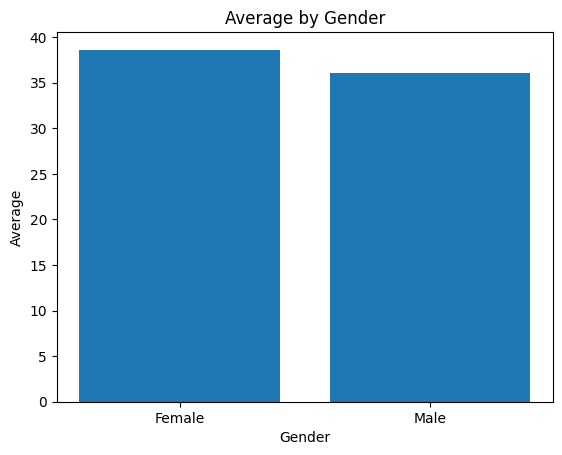

In [26]:
avggender = table.groupby("gender")["final_marks"].mean()

plt.bar(["Female", "Male"], avggender)
plt.title("Average by Gender")
plt.xlabel("Gender")
plt.ylabel("Average")
plt.show()


with this visualization we can better understand the gender row more and see the affects gender has on a student. 

# Cluster Modeling 

# K-means clustering 

I chose the use the K-means clustering it's a simple and efficient algorithm for finding distinct groups in numeric data. Which is perfect for my dataset and the main questions I am trying the answer in this project which is "what clustors are there in this dataset?" and "what factors most improve a student grades?". 

Pros:
- Fast and efficient
- Easy to understand

Cons:
- Sensitive
- possible assumes clusters are similar in size and shape

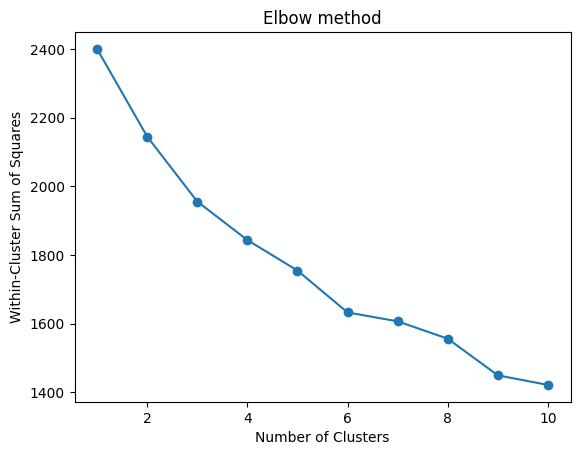

In [ ]:
factors = table[[
    "quiz1_marks",
    "quiz2_marks",
    "quiz3_marks",
    "midterm_marks",
    "final_marks",
    "previous_gpa",
    "attendance_rate",
    "lab_participation"
]]
scale = StandardScaler()
scaled_features = scale.fit_transform(factors)

within = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    within.append(km.inertia_)

plt.plot(range(1, 11), within, marker='o')
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

For this K-mean cluster model, I created a table of most of the factors in the dataset and used the elbow method to create a visual demonstration of the within-cluster sum of squares compared to the number of clusters in the dataset. This visualization helps identify the point where the decrease in the within-cluster sum of squares starts to slow down. This point shows the ideal number of clusters. 

In [24]:
kmean = KMeans(n_clusters=3, random_state=42)
kmeansFactors = kmean.fit_predict(scaled_features)

table["k-means cluster"] = kmeansFactors

kmeansSil = silhouette_score(scaled_features, kmeansFactors)
print("K-Means Silhouette Score:", round(kmeansSil, 3))

kmeansChart = table.groupby("k-means cluster")[[
    "quiz1_marks","quiz2_marks","quiz3_marks","midterm_marks",
    "final_marks","previous_gpa","attendance_rate","lab_participation"
]].mean()

kmeansChart

K-Means Silhouette Score: 0.103


,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,attendance_rate,lab_participation
k-means cluster,,,,,,,,
0,6.120561,6.714953,5.300000,19.005607,38.839252,2.549252,0.739875,0.529595
1,7.847826,6.140870,6.554783,20.009565,42.780870,2.935478,0.288406,0.652174
2,7.935897,4.298718,4.100000,21.230769,27.396154,2.967436,0.487179,0.305556


In this k-mean cluster model what I did was make a table of the important factors associated with a students grades. The table displays the average values of each feature within each K-Means cluster. Overall this table is meant to help understand the characterizes each cluster which gives insight into the behavior and performance trends of students. 

# Agglomerative Clustering

I chose Agglomerative Clustering for my second type of clustering model because it works well with K-means clustering and confirm whether the same group patterns appear when using a hierarchical approach. 

Pros:
- Produces a hierarchy

Cons:
- Harder to understand

In [15]:
agg = AgglomerativeClustering(n_clusters=3)
aggFactors = agg.fit_predict(scaled_features)

table["Agglomerative"] = aggFactors

aggSil = silhouette_score(scaled_features, aggFactors)
print("Agglomerative Silhouette Score:", round(aggSil, 3))

Agglomerative Silhouette Score: 0.074


I used Agglomerative Clustering to show the silhouette score and how it measures each data point and how it fits within its assigned cluster versus other clusters. Comparing the K-Means and Agglomerative scores shows which method forms more important clusters for the dataset. 

# Storytelling

For this project, I chose the student performance and clustering dataset. I wanted to analyze a dataset that contains information about students and their performances. My goal for this project is to identify patterns and trends within the data that may help us understand what factors contribute to student success. The first thing I did was pre-process my data to try to make it as accurate as possible, then I described my data to better understand it. Once I did those first steps, I made my cluster models. For my first one, I made a k-means cluster model, and I made a visual demonstration of the within-cluster sum of squares compared to the number of clusters in the dataset. This visualization helps identify the point where the decrease in the within-cluster sum of squares starts to slow down this shows the ideal number of clusters. Then I made a k-means cluster table to show important factors associated with a student's grades. After that, I used agglomerative clustering to confirm whether the same group patterns appear when using a hierarchical approach. Using the agglomerative cluster I showed the silhouette score and how it measures each data point and how it fits within its assigned cluster versus other clusters. 


# Impact Section

Overall, the impact I hope to have is a positive one that helps students see what is important for getting good grades. However, I could have a negative impact if my data is incorrect, potentially giving students the wrong idea about what is most commonly associated with academic success.